# Proyecto de agrupación de clientes

## Motivación

1. Implementar métodos para identificar grupos o clusters en el conjunto de datos seleccionado.
2. Comprender las características de los diferentes grupos de clientes para realizar la segmentación o creación de nuevos productos.


### Contexto

Considerance el contexto económico actual, se requiere desarrollar nuevos productos ajustados a los perfiles de los clientes actuales.

### Objetivo

Comprender las características principales de los clientes actuales para el desarrollo de productos que sean rentables, considerando las abstracciones del análisis.


## Descripción del dataset

1. Fuente de datos: dataset obtenido en [Kaggle](https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering). Contiene información personal y de consumo de 2240 individuos.
2. Variables: 
    - ID: ID para cada individuo en el dataset
    - Year_Birth: año de nacimiento
    - Education: grado de escolaridad más alto
    - Marital_Status: estado civil
    - Income: ingresos anuales
    - Kidhome: número de niños en el hogar
    - Teenhome: número de adolescentes en el hogar
    - Dt_Customer: fecha en que se inscribió el usuario
    - Recency: número de días desde la última compra o interacción
    - MntWines: dinero gastado en vino
    - MntFruits: dinero gastado en frutas
    - MntMeatProducts: dinero gastado en carnes
    - MntSweetProducts: dinero gastado en dulces
    - MntGoldProds: dinero gastado en oro
    - NumDealsPurchases: número de compras con descuento
    - NumWebPurchases: número de compras por internet
    - NumCatalogPurchases: número de compras por catálogo
    - NumStorePurchases: número de compras en tiendas físicas
    - NumWebVisitsMonth: número de visitas al sitio web de la compañía
    - AcceptedCmp3: indicador binario de si el usuario aceptó la tercera campaña de marketing
    - AcceptedCmp4: indicador binario de si el usuario aceptó la cuarta campaña de marketing
    - AcceptedCmp5: indicador binario de si el usuario aceptó la quinta campaña de marketing
    - AcceptedCmp1: indicador binario de si el usuario aceptó la primera campaña de marketing
    - AcceptedCmp2: indicador binario de si el usuario aceptó la segunda campaña de marketing
    - Complain: indicador binario de si la persona ha presentado una queja
    - Z_CostContact: coste constante asociado al contacto con un cliente
    - Z_Revenue: ingresos constantes asociados a una respuesta satisfactoria de la campaña
    - Response: indicador binario de si el usuario respondió a la campaña de marketing.



In [71]:
# Importación de las bibliotecas necesarias
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importación de módulos específicos de scikit-learn para tareas de machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

# Importación de módulos de Yellowbrick para visualización de modelos de machine learning
from yellowbrick.features import PCA as yb_pca
from yellowbrick.cluster import InterclusterDistance, SilhouetteVisualizer, KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Exploración de los datos

En este punto se procede a cargar el dataset y hacer una exploración de los datos. Se revisa la información de cada columna, su tipo y la existencia de valores nulos; si es necesario se transforma la columna al tipo correcto de datos y se hace tratamiento de valores nulos. Para el atributo "Income", por ejemplo, se hace imputación de valores usando el valor promedio agrupado por "Education".

In [72]:
# Lectura y copia de dataset
clientes_raw = pd.read_csv(r"..\data\raw\customer_segmentation.csv")
clientes = clientes_raw.copy()

# Información de los tipos de columnas. Solo la columna Income contiene valores nulos.
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [73]:
# Visualización de las primeras filas del dataset
clientes.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [74]:
#Validación de IDs duplicados
clientes[clientes.duplicated(subset='ID', keep= False)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [75]:
# Revisión de filas con valores nulos
clientes[clientes.isna().any(axis = 1)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0


In [76]:
# Se imputan los valores nulos del atributo income de acuerdo a la media por "Education"
clientes['Income'] = clientes['Income'].fillna(
    clientes.groupby(by=['Education'])['Income'].transform('mean'))

In [77]:
#sns.pairplot(clientes)

Dentro del análisis exploratorio se visualiza la correlación que hay entre las variables. Se observa una lógica correlación positiva entre el ingreso anual de los individuos y el monto gastado en cada categoría de producto, también una correlación positiva con compras por todos los medios excepto compras con descuento. Adicionalmente, hay una correlación negativa entre los ingresos anuales y la cantidad de niños en el hogar.

Una correlación negativa interesante se observa entre la cantidad de visitas al sitio web de la compañía y atributos como el income, monto gastado en productos y cantidad compras por diferentes medios.

<Axes: >

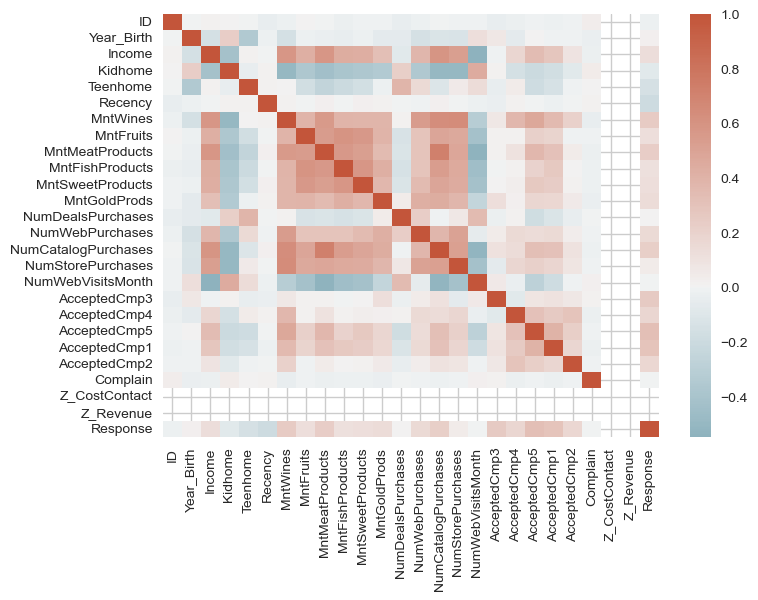

In [80]:

cpal = sns.diverging_palette(h_neg=220, h_pos=20, as_cmap=True)
sns.heatmap(clientes.select_dtypes(
    include=np.number).corr(), center=0, cmap=cpal)

Las columnas Z_Revenue y Z_CostContact son elementos constantes, y debido a ello no representan ninguna ingerencia o correlación con las demás variables. Por ende se eliminarán dichos campos.

In [81]:

for column in clientes.select_dtypes(exclude=np.number).columns:
    print(clientes[column].value_counts())


Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64


In [82]:
clientes['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Los valores Alone, Absurd y YOLO tienen una proporción mínima en el dataset, además de que no son significativos, por esta razón se eliminan las filas relacionadas.

In [83]:
clientes = clientes[~clientes['Marital_Status'].isin(
    ['Alone', 'Absurd', 'YOLO'])]

In [84]:
clientes['Dt_Customer'] = pd.to_datetime(
    clientes['Dt_Customer'], format='%d-%m-%Y')
clientes['Complain'] = clientes['Complain'].astype(str).astype('category')
clientes['Response'] = clientes['Response'].astype(str).astype('category')
clientes['Education'] = clientes['Education'].astype('category')
clientes['Marital_Status'] = clientes['Marital_Status'].astype('category')
clientes['ID'] = clientes['ID'].astype('category')


In [85]:
clientes

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [86]:
#sns.pairplot(clientes.select_dtypes(np.number))

In [87]:
clientes.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue
count,2233.000000,2233.000000,2233.000000,2233.000000,2233,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,...,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.0,2233.0
mean,1968.790864,52250.373901,0.444245,0.506046,2013-07-10 10:37:08.034034688,49.172414,304.033587,26.300940,167.113300,37.445141,...,2.661890,5.79176,5.316167,0.072548,0.074787,0.072548,0.064039,0.013435,3.0,11.0
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,1959.000000,35523.000000,0.000000,0.000000,2013-01-17 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,...,0.000000,3.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
50%,1970.000000,51650.000000,0.000000,0.000000,2013-07-09 00:00:00,50.000000,173.000000,8.000000,67.000000,12.000000,...,2.000000,5.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
75%,1977.000000,68316.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,505.000000,33.000000,232.000000,50.000000,...,4.000000,8.00000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.00000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0
std,11.979248,25063.926042,0.538528,0.544675,NaN,28.962114,336.953019,39.779532,225.870588,54.461569,...,2.921749,3.25473,2.425668,0.259451,0.263107,0.259451,0.244878,0.115153,0.0,0.0


## Ingeniería de atributos

Un paso importante antes de crear un modelo de machine learning es la ingeniería de atributos, el cual consta de diferentes procesos como la creación de nuevas características, la codificación o estandarización de atributos y la reducción de dimensiones. La aplicación de uno o otro tipo de ingeniería de atributos depende del dataset, la distribución de sus atributos y la pertinencia en cuanto al escenario planteado.

In [88]:
# Creación de nuevos atributos a partir de características existentes en el dataset.
clientes["TotalAcceptedCmp"] = clientes["AcceptedCmp1"] + clientes["AcceptedCmp2"] + \
    clientes["AcceptedCmp3"] + \
    clientes["AcceptedCmp4"] + clientes["AcceptedCmp5"]

current_year = clientes['Dt_Customer'].max().year
clientes['Age'] = current_year - clientes['Year_Birth']

clientes['dias registrados'] = (
    clientes['Dt_Customer'].max() - clientes['Dt_Customer']).dt.days

clientes["MntTotal"] = clientes["MntFishProducts"] + clientes["MntFruits"] + clientes["MntGoldProds"] + \
    clientes["MntMeatProducts"] + \
    clientes["MntSweetProducts"] + clientes["MntWines"]

clientes["NumPurchases"] = clientes["NumCatalogPurchases"] + \
    clientes["NumDealsPurchases"] + \
    clientes["NumStorePurchases"] + clientes["NumWebPurchases"]

In [89]:
print(clientes.Z_Revenue.value_counts())
print(clientes.Z_CostContact.value_counts())
clientes = clientes.drop([], axis=1)

Z_Revenue
11    2233
Name: count, dtype: int64
Z_CostContact
3    2233
Name: count, dtype: int64


In [90]:
clientes = clientes.drop(['Dt_Customer', 'Year_Birth', 'Z_CostContact', 'Z_Revenue',
                         "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
                         "AcceptedCmp5"], axis=1)


In [91]:
clientes['Age'].sort_values(ascending=False)

239     121
339     115
192     114
1950     74
424      73
       ... 
1850     19
995      19
747      19
1170     18
46       18
Name: Age, Length: 2233, dtype: int64

In [92]:
clientes = clientes[clientes['Age'] < 114]

In [93]:
clientes['Income'].sort_values()

1245      1730.0
21        2447.0
1524      3502.0
1846      4023.0
1975      4428.0
          ...   
164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: Income, Length: 2230, dtype: float64

In [94]:
clientes=clientes[clientes['Income'] < 600000]

In [95]:
#sns.pairplot(clientes.select_dtypes(np.number))

In [96]:
clientes = clientes.set_index('ID')
col_nocod = ['Complain', 'Response']
col_cat = clientes.drop(col_nocod, axis=1).select_dtypes(
    exclude=np.number).columns
col_num = clientes.select_dtypes(include=np.number).columns


In [97]:
codificador = OneHotEncoder()
columnas_codificadas = codificador.fit_transform(clientes[col_cat]).toarray()
clientes_codificado = pd.DataFrame(
    columnas_codificadas, index=clientes.index, columns=codificador.get_feature_names_out(col_cat))

In [98]:
clientes.select_dtypes(include=np.number).columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'TotalAcceptedCmp', 'Age', 'dias registrados', 'MntTotal',
       'NumPurchases'],
      dtype='object')

In [99]:
escalador = StandardScaler()
columnas_estandarizadas = escalador.fit_transform(clientes[col_num])
clientes_estandarizados = pd.DataFrame(
    columnas_estandarizadas, index=clientes.index, columns=col_num)
clientes_procesado = pd.concat(
    [clientes_estandarizados, clientes_codificado, clientes[col_nocod].astype(float)], axis=1)

[Text(0.5, 0, 'Número de componentes'),
 Text(0, 0.5, 'Varianza explicada acumulada')]

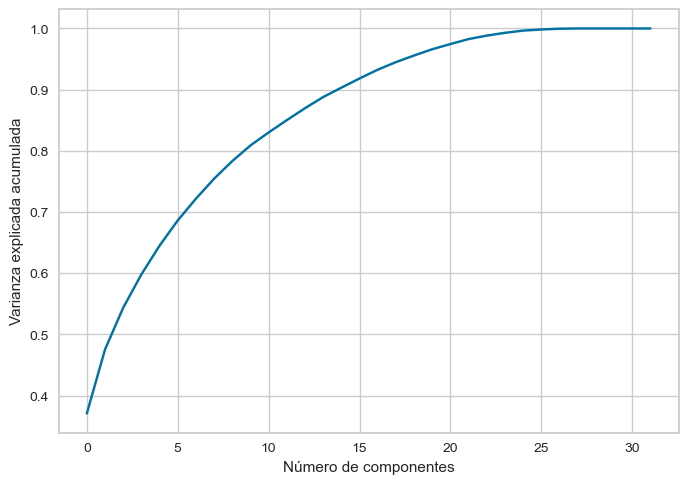

In [100]:
pca = PCA(random_state=100)
pca.fit(clientes_procesado)
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)
sns.lineplot(varianza_acumulada).set(
    xlabel='Número de componentes', ylabel='Varianza explicada acumulada')

In [101]:
varianza_acumulada

array([0.37069883, 0.47532398, 0.54351727, 0.59801937, 0.64499113,
       0.68622113, 0.72178114, 0.75443895, 0.78327473, 0.80881723,
       0.83005404, 0.85015585, 0.86968781, 0.88793839, 0.90327015,
       0.9182921 , 0.93265077, 0.94500326, 0.95584587, 0.96610254,
       0.97458272, 0.98269995, 0.98834105, 0.99289171, 0.99652016,
       0.99836424, 0.9995911 , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

## Aprendizaje estadístico

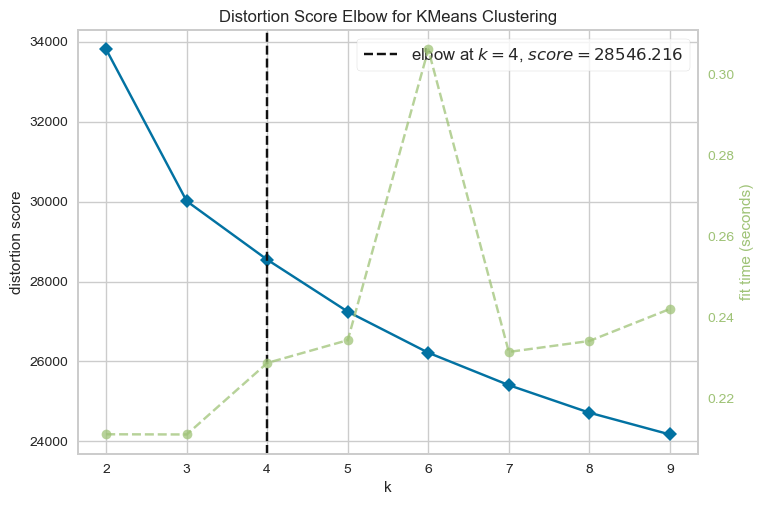

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [102]:
Elbow_M = KElbowVisualizer(KMeans(random_state=100), k=(2, 10))
Elbow_M.fit(clientes_procesado)
Elbow_M.show()

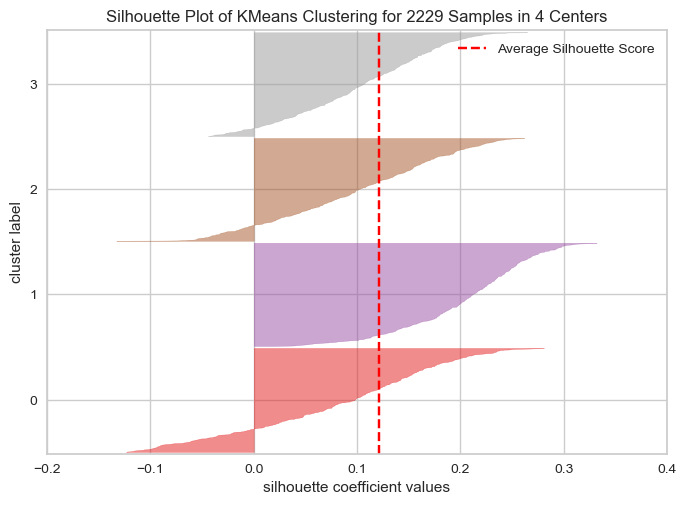

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2229 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [103]:
Sil_M = SilhouetteVisualizer(KMeans(4, random_state=100))
Sil_M.fit(clientes_procesado)
Sil_M.show()

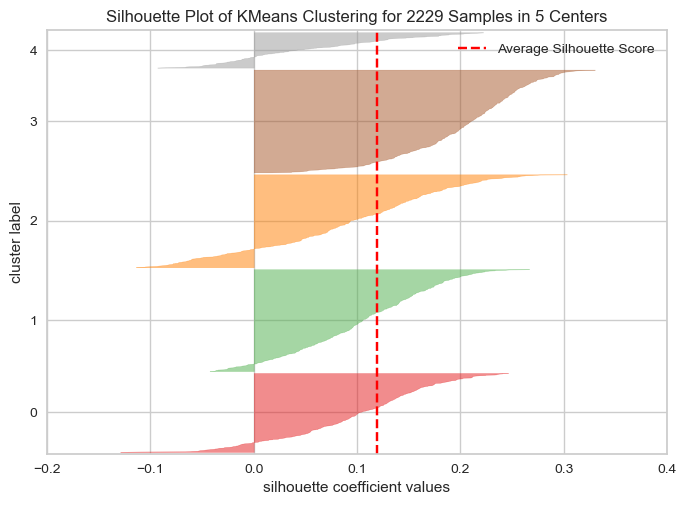

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2229 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [104]:
Sil_M = SilhouetteVisualizer(KMeans(5, random_state=100))
Sil_M.fit(clientes_procesado)
Sil_M.show()

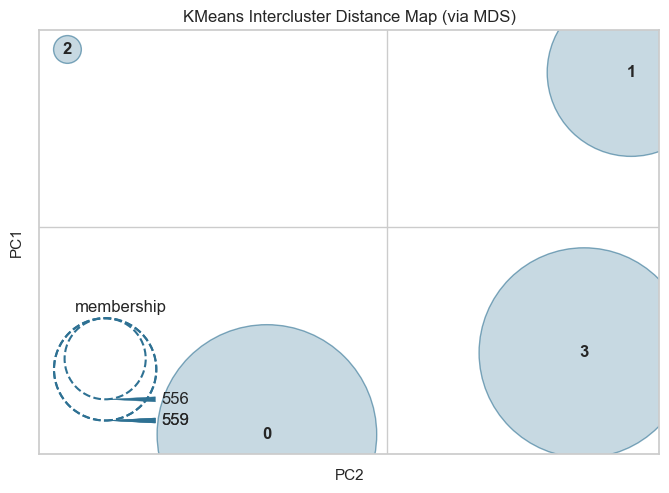

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [105]:
Inter_M = InterclusterDistance(KMeans(4, random_state=100))
Inter_M.fit(clientes_procesado)
Inter_M.show()

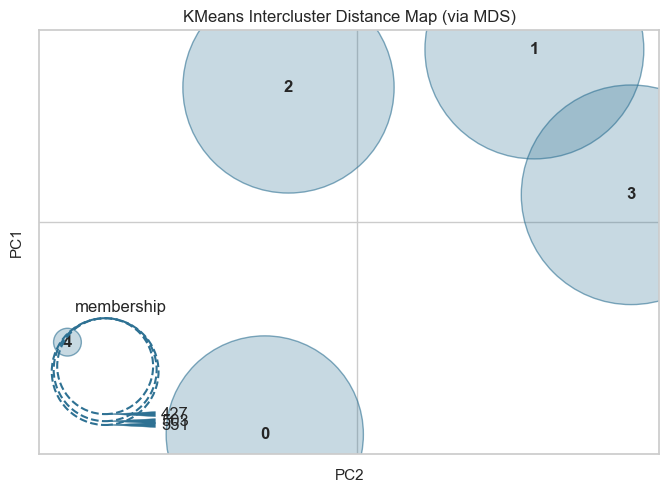

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [106]:
Inter_M = InterclusterDistance(KMeans(5, random_state=100))
Inter_M.fit(clientes_procesado)
Inter_M.show()

In [107]:
KM = KMeans(n_clusters=4, random_state=100)
# Entrenar el modelo y predecir los clusters
yhat_KM = KM.fit_predict(clientes_procesado)
# Añadir el atributo de clusters al dataset original
clientes_procesado["cluster"] = yhat_KM
clientes["cluster"] = yhat_KM

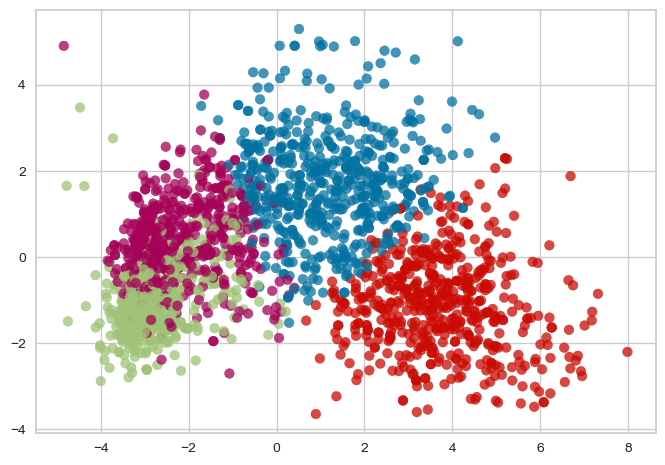

In [108]:
pca_viz = yb_pca(scale=True, projection=2, random_state=100).fit_transform(
    clientes_procesado.drop("cluster", axis=1), clientes_procesado["cluster"])

,PC1,PC2
MntTotal,0.335581,-0.018708
Income,0.298493,0.000031
NumPurchases,0.296203,0.272531
NumCatalogPurchases,0.291136,-0.017730
MntWines,0.284705,0.133836
MntMeatProducts,0.280104,-0.158952
NumStorePurchases,0.268367,0.128648
MntFishProducts,0.243784,-0.176705
MntSweetProducts,0.236536,-0.149447
MntFruits,0.235378,-0.166220


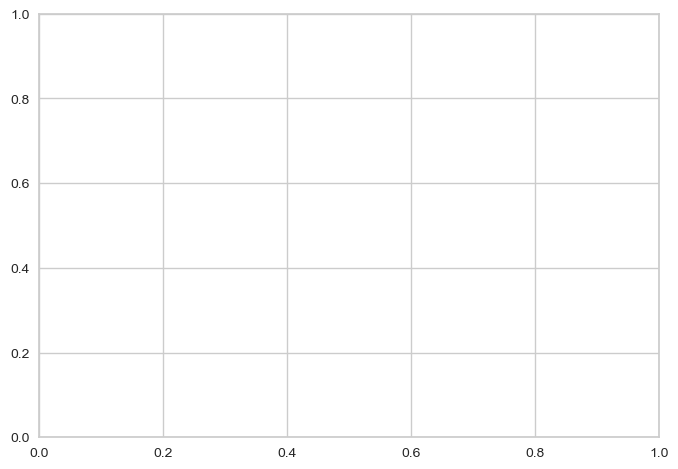

In [109]:
pca_components = yb_pca(scale=True, projection=2, random_state=100).fit(
    clientes_procesado.drop("cluster", axis=1), clientes_procesado["cluster"]).pca_components_
pca_detail = pd.DataFrame(pca_components, columns=clientes_procesado.drop(
    "cluster", axis=1).columns, index=["PC1", "PC2"]).T
pca_detail.sort_values("PC1", key=abs, ascending=False)

In [38]:
pca_detail.sort_values("PC2", key=abs, ascending=False)

,PC1,PC2
NumDealsPurchases,-0.018233,0.458812
Teenhome,-0.030089,0.451317
NumWebPurchases,0.211111,0.302345
NumPurchases,0.296203,0.272531
Age,0.059599,0.271179
NumWebVisitsMonth,-0.208107,0.251964
dias registrados,0.046063,0.185067
Education_PhD,0.013225,0.183977
MntFishProducts,0.243784,-0.176705
MntFruits,0.235378,-0.166220


[Text(0, 0, '560'), Text(0, 0, '556'), Text(0, 0, '554'), Text(0, 0, '559')]

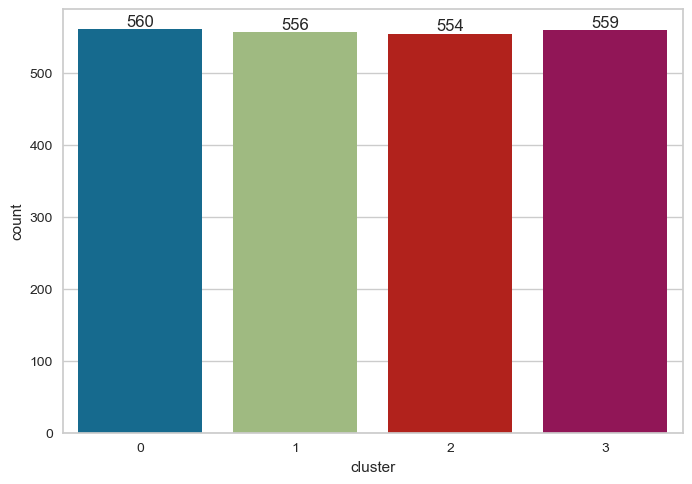

In [39]:
ax = sns.countplot(x=clientes_procesado["cluster"])
ax.bar_label(ax.containers[0])

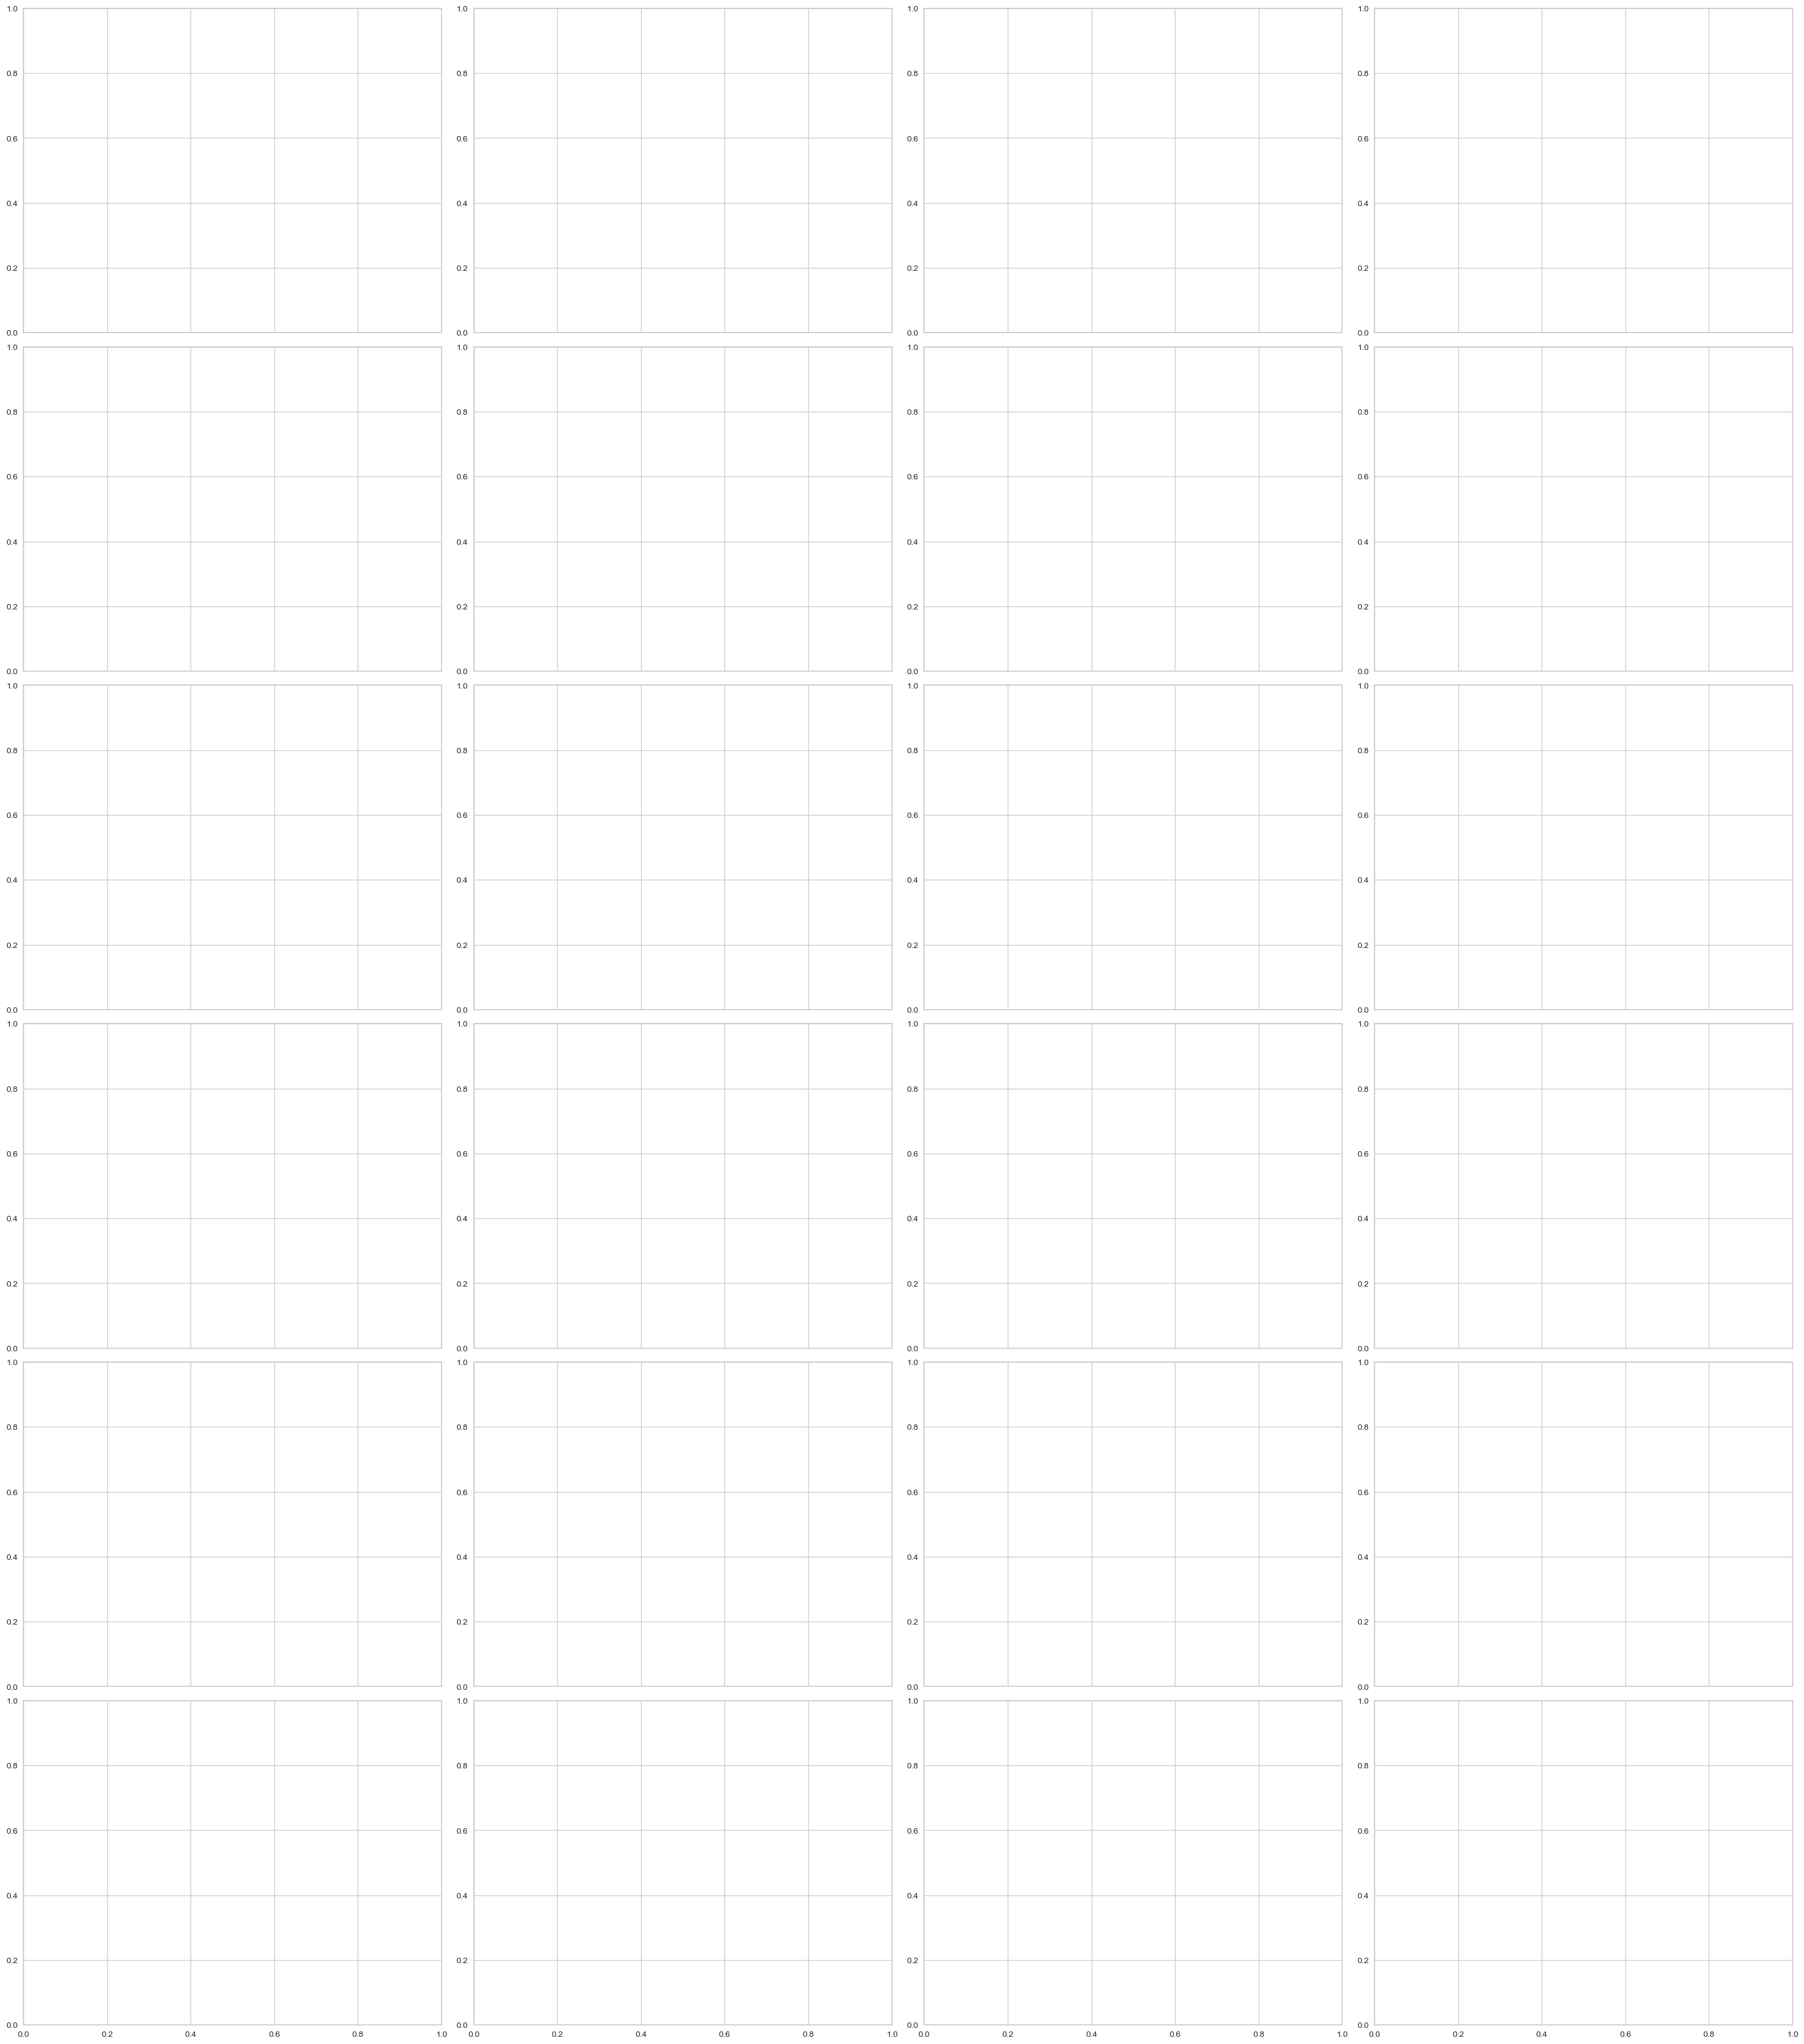

In [49]:
fig, axes = plt.subplots(
    nrows=6, ncols=4, constrained_layout=True, figsize=(30, 34), sharex=True)

In [52]:
for i, col in enumerate(clientes.columns[:-1]):
    nrow = i//4
    ncol = i % 4
    if col in col_num:
        sns.boxplot(data=clientes, x="cluster", y=col, ax=axes[nrow, ncol])
    else:
        sns.countplot(data=clientes, x='cluster', hue=col, ax=axes[nrow, ncol])

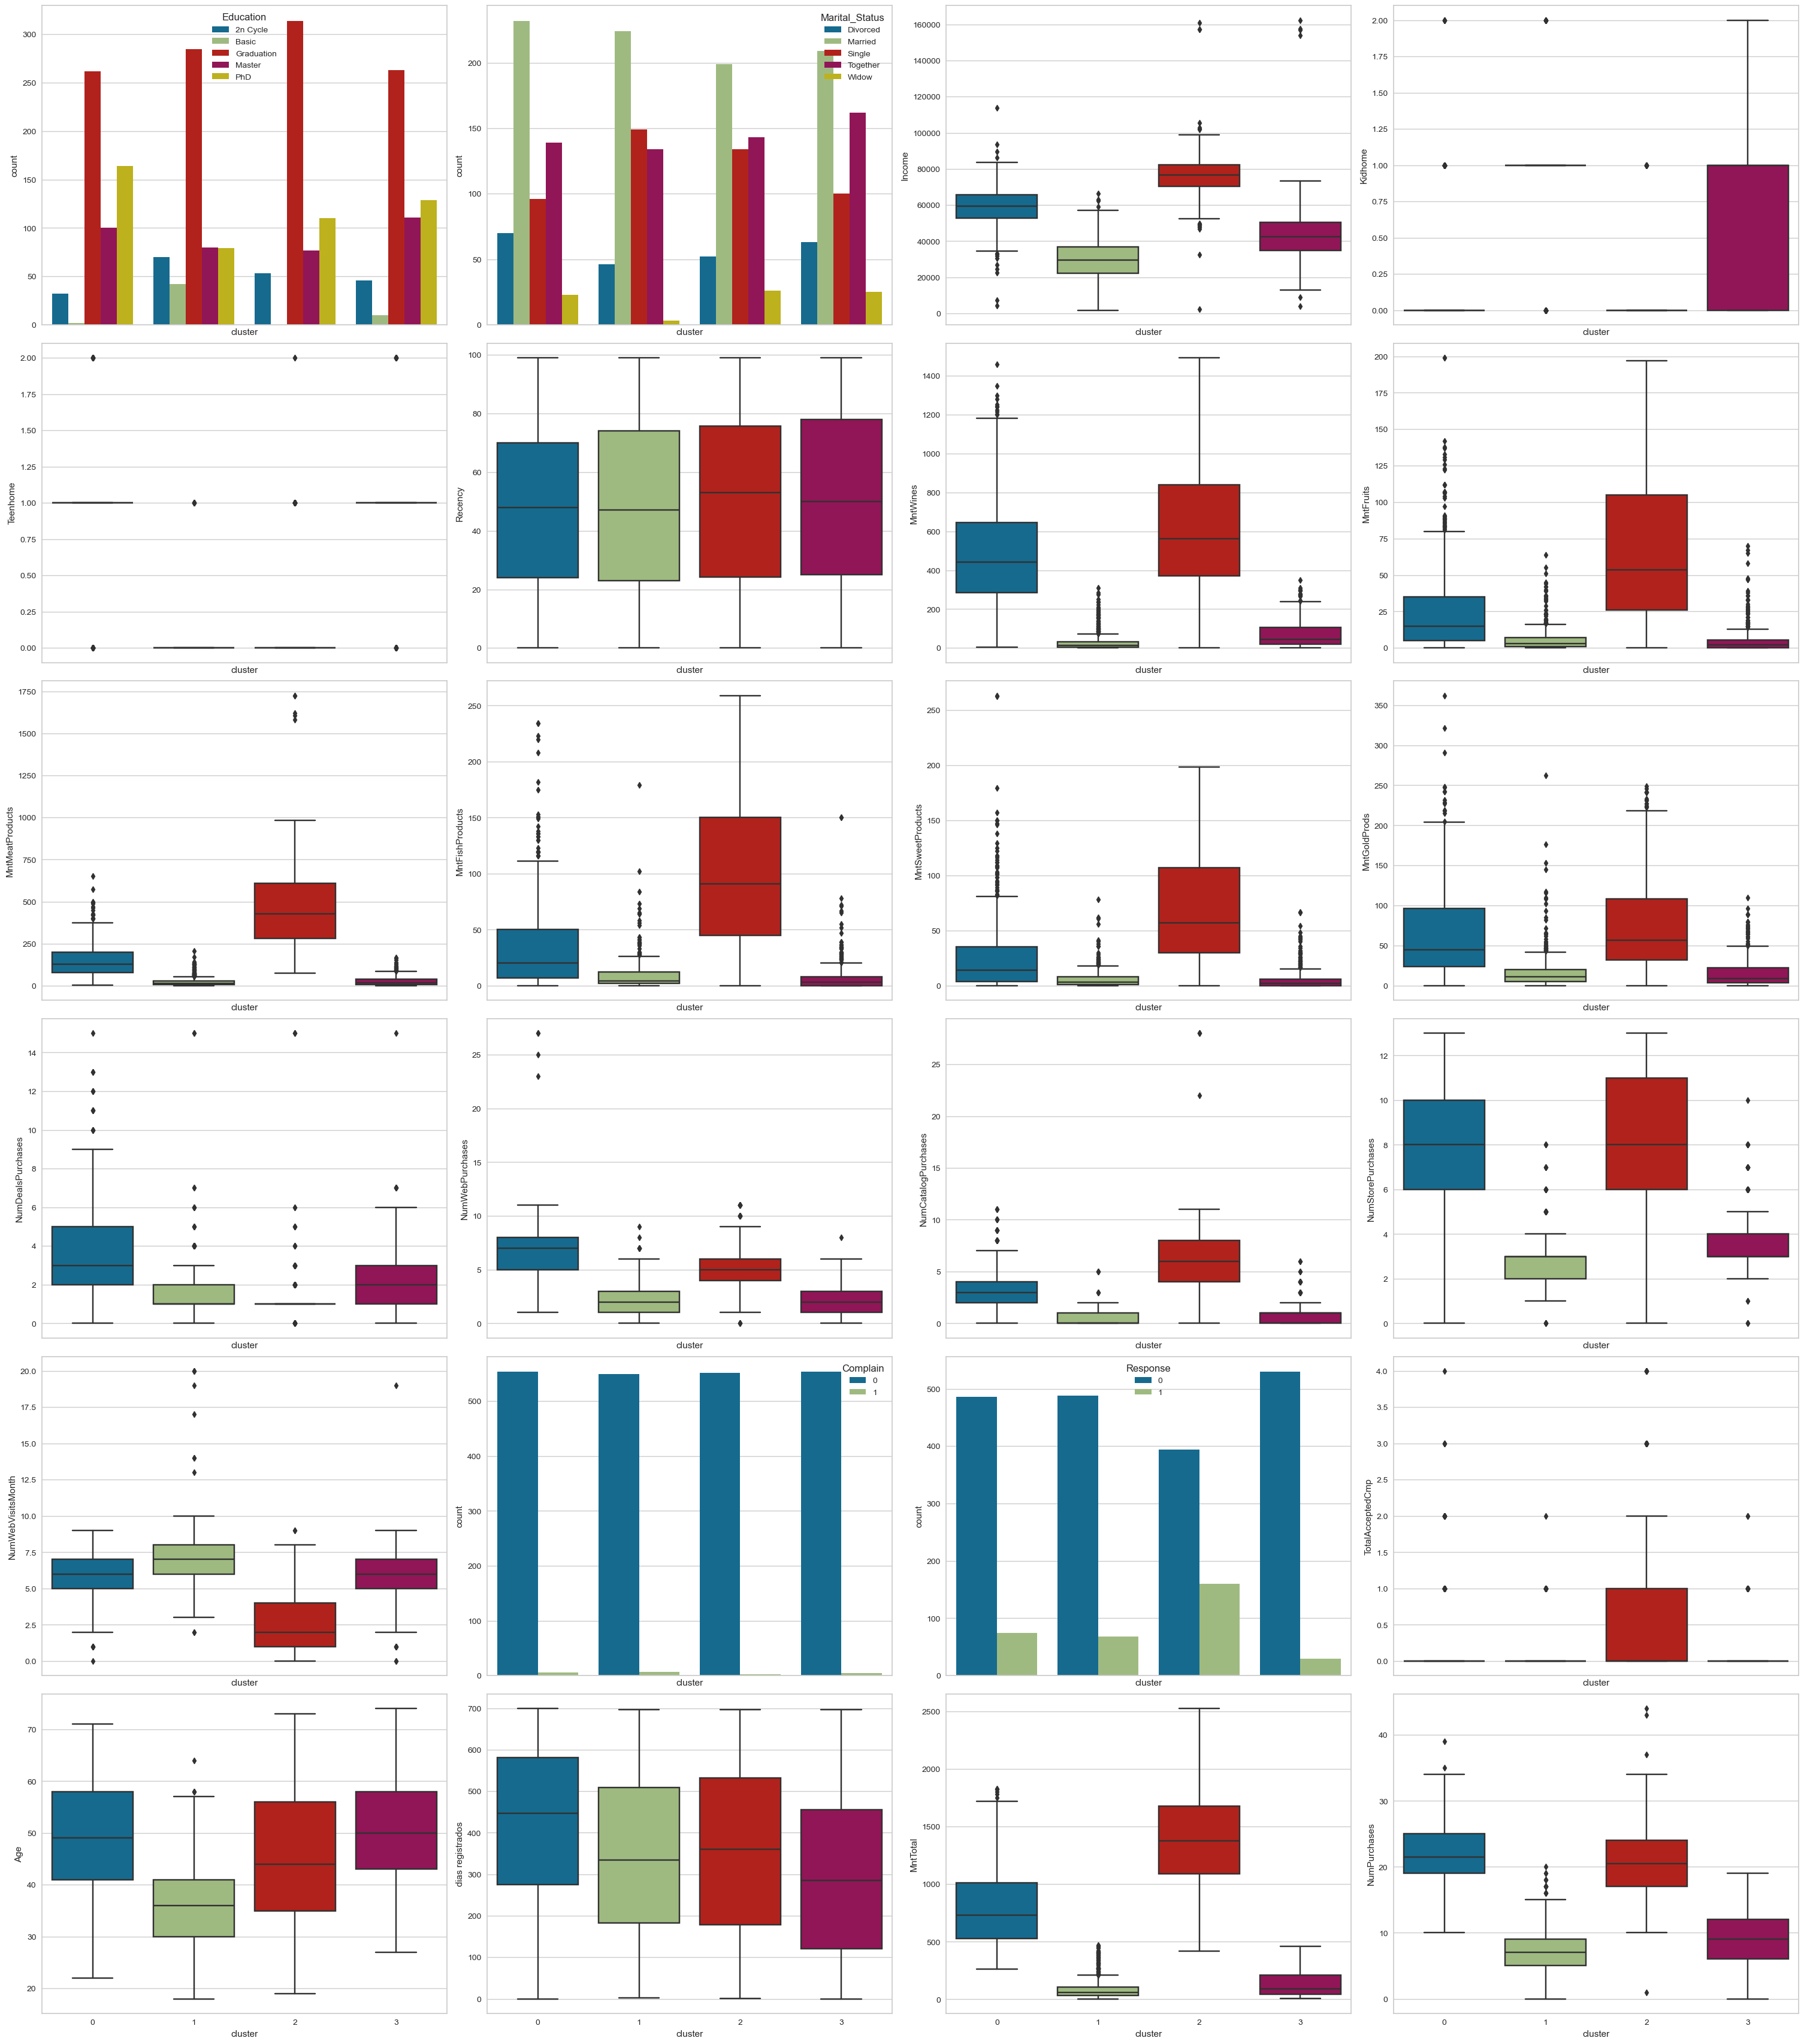

In [54]:
fig